#### Import Libraries

In [58]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

random_state = 123
np.random.seed(random_state)

warnings.simplefilter('ignore')
np.set_printoptions(precision=5, suppress=True)

sns.set_theme()

#### Importing Dataset

In [60]:
df = pd.read_csv('solar_weather.csv')

In [61]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

#### Average Energy Production by weather condition

In [63]:
avgEnergy = df.groupby("weather_type")["Energy delta[Wh]"].mean()

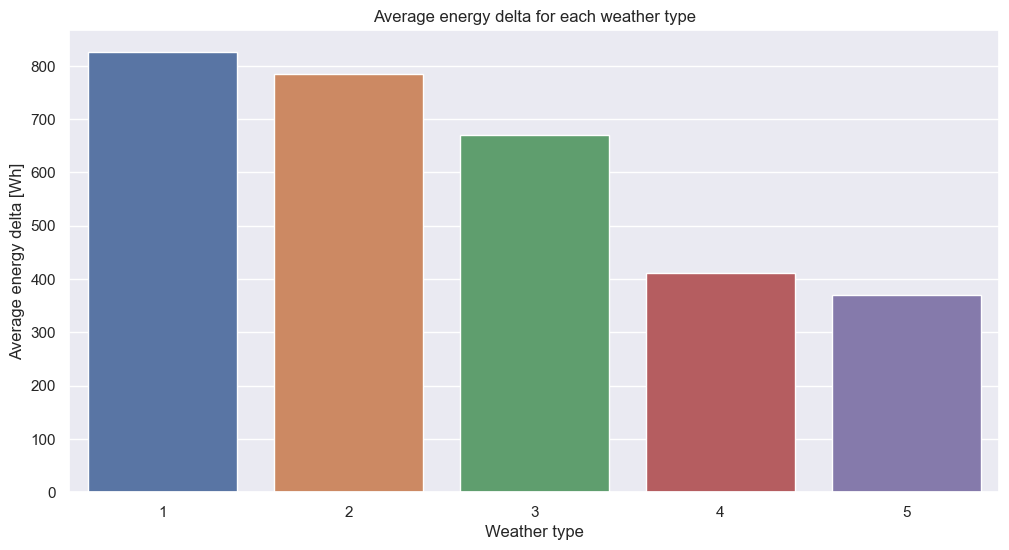

In [64]:
# Plot the average energy delta for each weather type
plt.figure(figsize=(12, 6))
sns.barplot(x=avgEnergy.index, y=avgEnergy.values)
plt.title("Average energy delta for each weather type")
plt.xlabel("Weather type")
plt.ylabel("Average energy delta [Wh]")
plt.show()

In [65]:
# Convert the time column to date_time format
df["Time"] = pd.to_datetime(df["Time"])

In [66]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


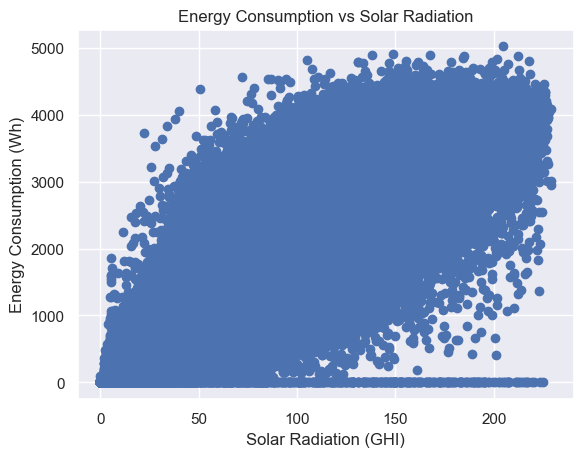

In [67]:
plt.scatter(df['GHI'], df['Energy delta[Wh]'])
plt.title("Energy Consumption vs Solar Radiation")
plt.xlabel("Solar Radiation (GHI)")
plt.ylabel("Energy Consumption (Wh)")
plt.show()

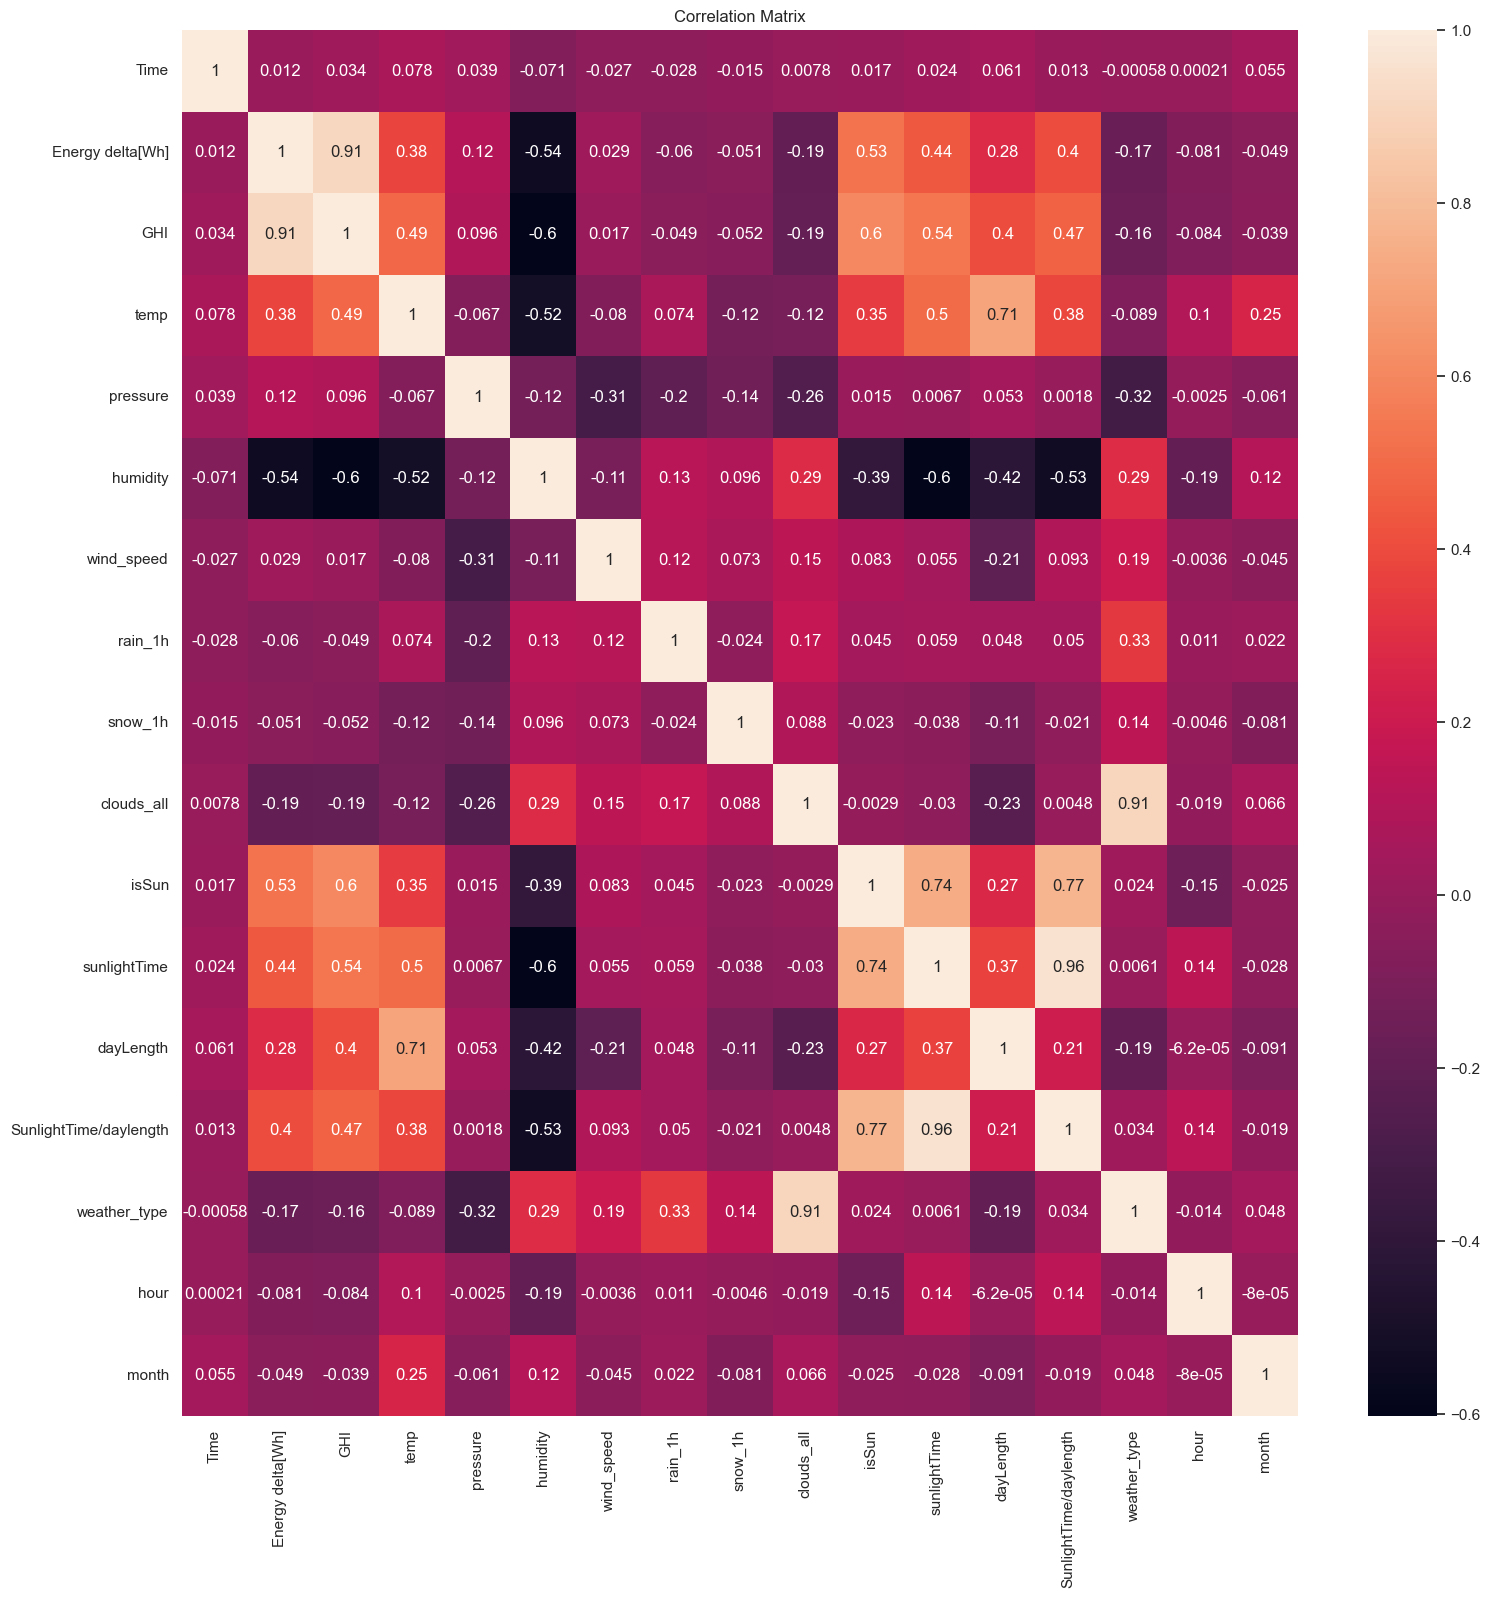

In [68]:
# Get the correlation matrix of the dataset

corrMatrix = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [69]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

In [70]:
# Average energy production per month
avgEnergyPerMonth = df.groupby(df["month"])["Energy delta[Wh]"].mean()

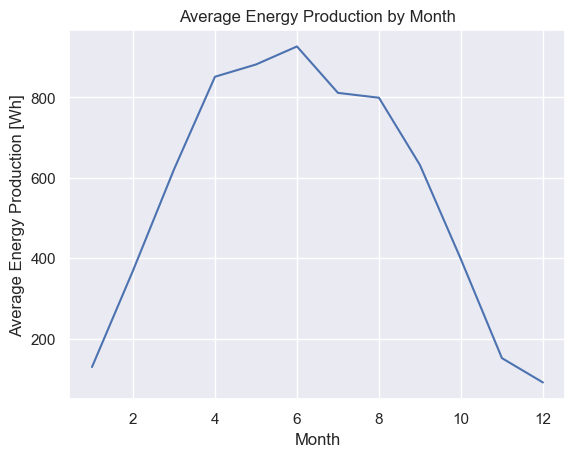

In [71]:
plt.plot(avgEnergyPerMonth.index, avgEnergyPerMonth.values)
plt.title("Average Energy Production by Month")
plt.xlabel("Month")
plt.ylabel("Average Energy Production [Wh]")
plt.show()

### Distribution of temperature during different weather conditions

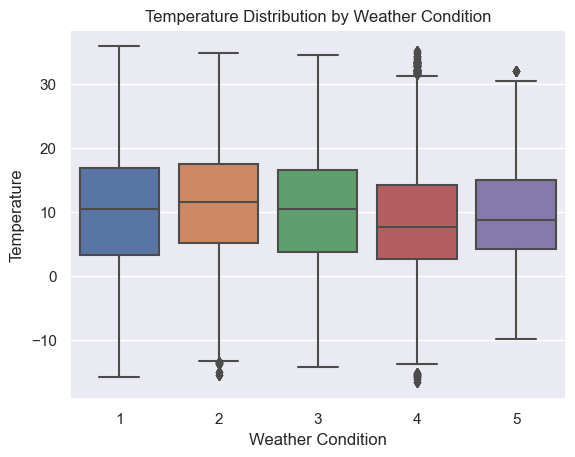

In [72]:
sns.boxplot(x="weather_type", y="temp", data=df)
plt.title("Temperature Distribution by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Temperature")
plt.show()

### Daily Energy production

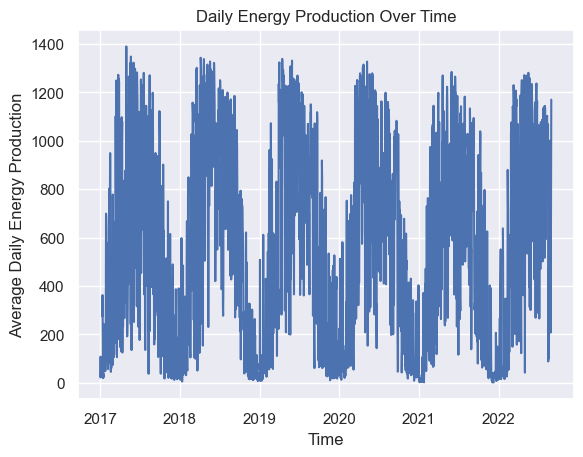

In [73]:
df["Time"] = pd.to_datetime(df["Time"])

# Set the "Time" column as the index of the DataFrame
df.set_index("Time", inplace=True)

# Resample the data to a daily frequency and calculate the average energy production
daily_energy = df["Energy delta[Wh]"].resample("D").mean()

# Plot the daily energy production over time
plt.plot(daily_energy.index, daily_energy.values)
plt.title("Daily Energy Production Over Time")
plt.xlabel("Time")
plt.ylabel("Average Daily Energy Production")
plt.show()

### Model Building

#### Data Pre-processing

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [75]:
# Handle the missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df)

In [76]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [77]:
# Normalize the features
scaler = StandardScaler()

In [78]:
normalized_data = scaler.fit_transform(data_imputed)

#### Split Data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data, df['Energy delta[Wh]'], test_size=0.2, random_state=42)

#### Model Selection

In [81]:
import xgboost as xgb

In [82]:
# Define the XGBoost regressor
model = xgb.XGBRegressor()

In [83]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Model Evaluation

In [84]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.3133373693856494


#### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}


In [87]:
# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor()

In [88]:
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [32]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}


In [33]:
# Train the model with the best parameters
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
# Make predictions
y_pred_best = best_xgb.predict(X_test)

In [35]:
# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
print("Root Mean Squared Error (Best Model):", rmse_best)

Root Mean Squared Error (Best Model): 0.8426769018314263


#### Prediction

In [36]:
# Normalize numerical features
future_data_normalized = scaler.transform(normalized_data)

In [37]:
# Print the shape of the normalized future data
print("Shape of normalized future data:", future_data_normalized.shape)

Shape of normalized future data: (196776, 16)


In [38]:
# Make predictions for future time periods using the best model
future_predictions_best = best_xgb.predict(future_data_normalized)

In [39]:
# Print the predictions
print("Predictions for future time periods:", future_predictions_best)

Predictions for future time periods: [0.00024 0.00024 0.00024 ... 0.00024 0.00024 0.00024]
